In [5]:
import numpy as np
import pandas as pd
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile,join
from random import shuffle 
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as ft
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils.np_utils import to_categorical


In [6]:
os.listdir('./brain_tumor_dataset')

['NO', 'yes']

In [18]:
img=Image.open('../brain_tumor_dataset/No/1.jpeg').resize((128,128))


In [19]:
yes=os.listdir('./brain_tumor_dataset/yes/')

In [20]:
yes

['Y1.jpg',
 'Y10.jpg',
 'Y100.JPG',
 'Y101.jpg',
 'Y102.jpg',
 'Y103.jpg',
 'Y104.jpg',
 'Y105.jpg',
 'Y106.jpg',
 'Y107.jpg',
 'Y108.jpg',
 'Y109.JPG',
 'Y11.jpg',
 'Y111.JPG',
 'Y112.JPG',
 'Y113.JPG',
 'Y114.JPG',
 'Y115.JPG',
 'Y116.JPG',
 'Y117.JPG',
 'Y12.jpg',
 'Y120.JPG',
 'Y13.jpg',
 'Y14.jpg',
 'Y146.JPG',
 'Y147.JPG',
 'Y148.JPG',
 'Y15.jpg',
 'Y153.jpg',
 'Y154.jpg',
 'Y155.JPG',
 'Y156.JPG',
 'Y157.JPG',
 'Y158.JPG',
 'Y159.JPG',
 'Y16.JPG',
 'Y160.JPG',
 'Y161.JPG',
 'Y162.jpg',
 'Y163.JPG',
 'Y164.JPG',
 'Y165.JPG',
 'Y166.JPG',
 'Y167.JPG',
 'Y168.jpg',
 'Y169.jpg',
 'Y17.jpg',
 'Y170.JPG',
 'Y18.JPG',
 'Y180.jpg',
 'Y181.jpg',
 'Y182.JPG',
 'Y183.jpg',
 'Y184.JPG',
 'Y185.jpg',
 'Y186.jpg',
 'Y187.jpg',
 'Y188.jpg',
 'Y19.JPG',
 'Y192.JPG',
 'Y193.JPG',
 'Y194.jpg',
 'Y195.JPG',
 'Y2.jpg',
 'Y20.jpg',
 'Y21.jpg',
 'Y22.jpg',
 'Y23.JPG',
 'Y24.jpg',
 'Y242.JPG',
 'Y243.JPG',
 'Y244.JPG',
 'Y245.jpg',
 'Y246.JPG',
 'Y247.JPG',
 'Y248.JPG',
 'Y249.JPG',
 'Y25.jpg',
 'Y250

In [21]:
no=os.listdir('./brain_tumor_dataset/No/')

In [23]:
data=np.concatenate([yes,no])

In [25]:
data.shape

(253,)

In [36]:
lable_yes=np.full(len(yes),1)

In [38]:
lable_no=np.full(len(no),0)

In [48]:
Image_data=[]

for i in yes:
    img=cv2.imread('./brain_tumor_dataset/yes/'+i)
    re_im=cv2.resize(img,(32,32))
    [r,g,b]=cv2.split(re_im)
    Image_data.append(cv2.merge([r,g,b]))

In [49]:
len(Image_data)

155

In [50]:


for i in no:
    img=cv2.imread('./brain_tumor_dataset/no/'+i)
    re_im=cv2.resize(img,(32,32))
    [r,g,b]=cv2.split(re_im)
    Image_data.append(cv2.merge([r,g,b]))

In [51]:
len(Image_data)

253

In [53]:
len(data)==len(Image_data) # both are equvel 

True

In [55]:
X=np.squeeze(Image_data)

In [58]:
X.shape

(253, 32, 32, 3)

In [61]:
X=(X.astype('float32'))/255

In [63]:
X.shape

(253, 32, 32, 3)

In [64]:
data_target=np.concatenate([lable_yes,lable_no])

In [65]:
(x_train,y_train),(x_test,y_test)=(X[:200],data_target[0:200]),(X[200:],data_target[200:])

In [66]:
(x_valid , y_valid) = (X[:63], data_target[:63])

In [68]:
import tensorflow as tf

In [72]:

model=tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))

model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['acc'])



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 16)         

In [73]:
model.fit(x_train,y_train,batch_size=32,epochs=100,validation_data=(x_valid , y_valid),)

Train on 200 samples, validate on 63 samples
Epoch 1/100
200/200 [==============================] - 7s 36ms/sample - loss: 0.5888 - acc: 0.6850 - val_loss: 0.4769 - val_acc: 1.0000
Epoch 2/100
200/200 [==============================] - 2s 9ms/sample - loss: 0.5218 - acc: 0.7750 - val_loss: 0.2503 - val_acc: 1.0000
Epoch 3/100
200/200 [==============================] - 1s 7ms/sample - loss: 0.5365 - acc: 0.7750 - val_loss: 0.5287 - val_acc: 1.0000
Epoch 4/100
200/200 [==============================] - 1s 6ms/sample - loss: 0.5381 - acc: 0.7750 - val_loss: 0.3646 - val_acc: 1.0000
Epoch 5/100
200/200 [==============================] - 1s 5ms/sample - loss: 0.4948 - acc: 0.7750 - val_loss: 0.3049 - val_acc: 1.0000
Epoch 6/100
200/200 [==============================] - 1s 5ms/sample - loss: 0.5048 - acc: 0.7750 - val_loss: 0.3529 - val_acc: 1.0000
Epoch 7/100
200/200 [==============================] - 1s 4ms/sample - loss: 0.4811 - acc: 0.7750 - val_loss: 0.4790 - val_acc: 1.0000
Epoch 8/1

Epoch 61/100
200/200 [==============================] - 1s 5ms/sample - loss: 0.1414 - acc: 0.9450 - val_loss: 0.0146 - val_acc: 1.0000
Epoch 62/100
200/200 [==============================] - 1s 5ms/sample - loss: 0.1094 - acc: 0.9600 - val_loss: 0.0285 - val_acc: 1.0000
Epoch 63/100
200/200 [==============================] - 1s 4ms/sample - loss: 0.1117 - acc: 0.9650 - val_loss: 0.0574 - val_acc: 0.9841
Epoch 64/100
200/200 [==============================] - 1s 4ms/sample - loss: 0.1335 - acc: 0.9500 - val_loss: 0.0419 - val_acc: 1.0000
Epoch 65/100
200/200 [==============================] - 1s 5ms/sample - loss: 0.1777 - acc: 0.9100 - val_loss: 0.0258 - val_acc: 1.0000
Epoch 66/100
200/200 [==============================] - 1s 5ms/sample - loss: 0.0888 - acc: 0.9700 - val_loss: 0.0314 - val_acc: 1.0000
Epoch 67/100
200/200 [==============================] - 1s 5ms/sample - loss: 0.0704 - acc: 0.9700 - val_loss: 0.0430 - val_acc: 1.0000
Epoch 68/100
200/200 [==========================

In [74]:
score=model.evaluate(x_test,y_test,verbose=0)

In [75]:
score

[2.804633360988689, 0.6792453]

In [76]:
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6792453


In [77]:
y_predict=model.predict(x_test)

In [97]:
y_predict.shape

(53, 1)

In [83]:
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    print(i,index)

0 33
1 45
2 4
3 17
4 3
5 7
6 39
7 51
8 42
9 31
10 16
11 49
12 30
13 8
14 32


In [81]:
labels =["Yes",  # index 0
        "No",      # index 1
        ]

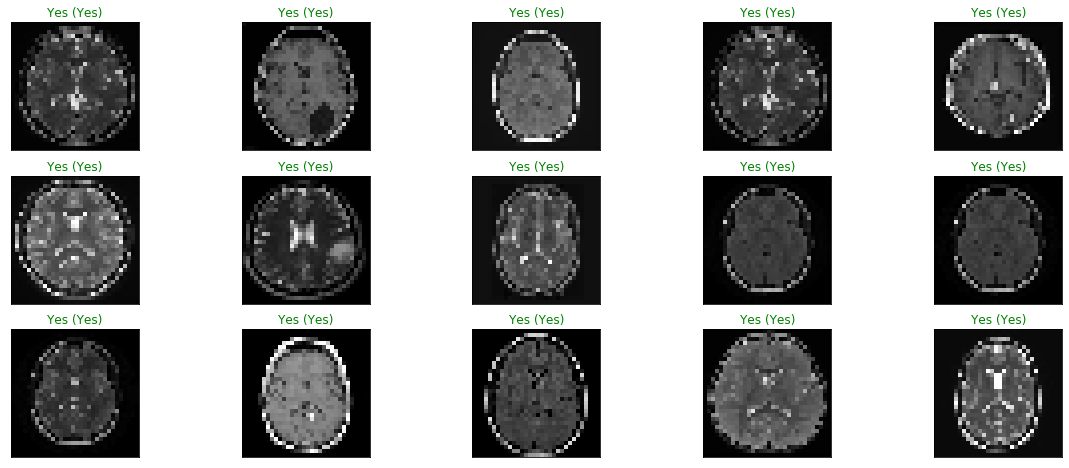

In [82]:
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_predict[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()


In [104]:
predict_index = []

for i in y_predict:
    predict_index.append(np.argmax(i))


In [107]:
predict_index

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [108]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [110]:
print('classification_report = {}'.format(classification_report(y_test,predict_index)))
print('confusion_matrix = {}'.format(confusion_matrix(y_test,predict_index)))




print('accuracy_score = {} '.format(accuracy_score(y_test,predict_index)*100))


classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53

confusion_matrix = [[53]]
accuracy_score = 100.0 
